In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
# Importing the training and testing sets
%run "./Data Splitting.ipynb"

In [35]:
# Importing the ML necessary libraries
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Modifying the DF for timeseries forecasting by adding the lag

In [38]:
grouped_df = grouped_df[["REVENUE","REPORT_DATE","IS_CODE6_ENABLED"]]
grouped_df.head()

,REVENUE,REPORT_DATE,IS_CODE6_ENABLED
0,51542876.0,2022-01-01,True
1,50323396.0,2022-01-02,True
2,40495420.0,2022-01-03,False
3,38233080.0,2022-01-04,False
4,38971034.0,2022-01-05,False


In [6]:
for i in range(1, 31):
    grouped_df[f'REVENUE_LAG_{i}'] = grouped_df['REVENUE'].shift(i)
    grouped_df[f'IS_CODE6_ENABLED_{i}'] = grouped_df['IS_CODE6_ENABLED'].shift(i).astype(bool)
grouped_df.dropna(inplace=True); grouped_df.reset_index(drop=True,inplace=True)
grouped_df

,REVENUE,REPORT_DATE,IS_CODE6_ENABLED,REVENUE_LAG_1,IS_CODE6_ENABLED_1,REVENUE_LAG_2,IS_CODE6_ENABLED_2,REVENUE_LAG_3,IS_CODE6_ENABLED_3,REVENUE_LAG_4,...,REVENUE_LAG_26,IS_CODE6_ENABLED_26,REVENUE_LAG_27,IS_CODE6_ENABLED_27,REVENUE_LAG_28,IS_CODE6_ENABLED_28,REVENUE_LAG_29,IS_CODE6_ENABLED_29,REVENUE_LAG_30,IS_CODE6_ENABLED_30
0,52844086.0,2022-01-31,True,53163720.0,True,55202179.0,True,49976530.0,True,49821942.0,...,38971034.0,False,38233080.0,False,40495420.0,False,50323396.0,True,51542876.0,True
1,50827217.0,2022-02-01,True,52844086.0,True,53163720.0,True,55202179.0,True,49976530.0,...,39868483.0,False,38971034.0,False,38233080.0,False,40495420.0,False,50323396.0,True
2,47161932.0,2022-02-02,True,50827217.0,True,52844086.0,True,53163720.0,True,55202179.0,...,38914818.0,False,39868483.0,False,38971034.0,False,38233080.0,False,40495420.0,False
3,47290207.0,2022-02-03,True,47161932.0,True,50827217.0,True,52844086.0,True,53163720.0,...,42112136.0,False,38914818.0,False,39868483.0,False,38971034.0,False,38233080.0,False
4,45669072.0,2022-02-04,True,47290207.0,True,47161932.0,True,50827217.0,True,52844086.0,...,40027863.0,False,42112136.0,False,38914818.0,False,39868483.0,False,38971034.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,45294984.0,2023-12-27,True,45645742.0,True,46914493.0,True,42341461.0,True,46480578.0,...,49363970.0,False,51797874.0,False,50908551.0,False,49815137.0,False,50485043.0,False
695,46355479.0,2023-12-28,True,45294984.0,True,45645742.0,True,46914493.0,True,42341461.0,...,186547029.0,True,49363970.0,False,51797874.0,False,50908551.0,False,49815137.0,False
696,46790381.0,2023-12-29,True,46355479.0,True,45294984.0,True,45645742.0,True,46914493.0,...,92529688.0,True,186547029.0,True,49363970.0,False,51797874.0,False,50908551.0,False
697,50994081.0,2023-12-30,True,46790381.0,True,46355479.0,True,45294984.0,True,45645742.0,...,85347487.0,True,92529688.0,True,186547029.0,True,49363970.0,False,51797874.0,False


In [8]:
# Splitting the new lagged dataFrame for training and testing
group_split_value = int(len(grouped_df)*0.8)

df_train = grouped_df.iloc[:group_split_value]
df_test = grouped_df.iloc[group_split_value:]

In [9]:
X_train = df_train.drop(columns=["REPORT_DATE","REVENUE"])
y_train = df_train["REVENUE"]

X_test = df_test.drop(columns=["REPORT_DATE","REVENUE"])
y_test = df_test["REVENUE"]

# Training phase using Gridsearch for parameter tuning

In [11]:
# Defining all combinations of hyperparamteres we re using
param_grid = {
    'n_estimators': [100, 200, 300, 1000],
    'learning_rate': [0.01, 0.001, 0.02],
    'max_depth': [3, 6, 11,17,15,25],
    'reg_alpha': [1.1,  1.3],
    'reg_lambda': [1.1, 1.3],
    'subsample': [0.7, 0.8]
}

In [33]:
# # Defining and training the model
# regressor = xgb.XGBRegressor(objective='reg:squarederror')

# # GridSearch job to find the best tuned regressor
# grid_search = GridSearchCV(
#     estimator=regressor,
#     param_grid=param_grid,
#     scoring='neg_mean_absolute_error',  
#     cv=5,  
#     verbose=10,
#     n_jobs=-1  # Use all available cores
# )

# grid_search.fit(X_train.values, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.001, 0.02],
                         'max_depth': [3, 6, 11, 17, 15, 25],
                         'n_estimators': [100, 200, 300, 1000],
                         'reg_alpha': [1.1, 1.3], 'reg_lambda': [1.1, 1.3],
                         'subsample': [0.7, 0.8]},
             scoring='neg_mean_absolute_error', verbose=10)

In [34]:
# model = grid_search.best_estimator_
# model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [12]:
model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.02, max_depth=6, n_estimators=300)

model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
y_pred = model.predict(X_test)

<Axes: xlabel='REPORT_DATE', ylabel='REVENUE'>

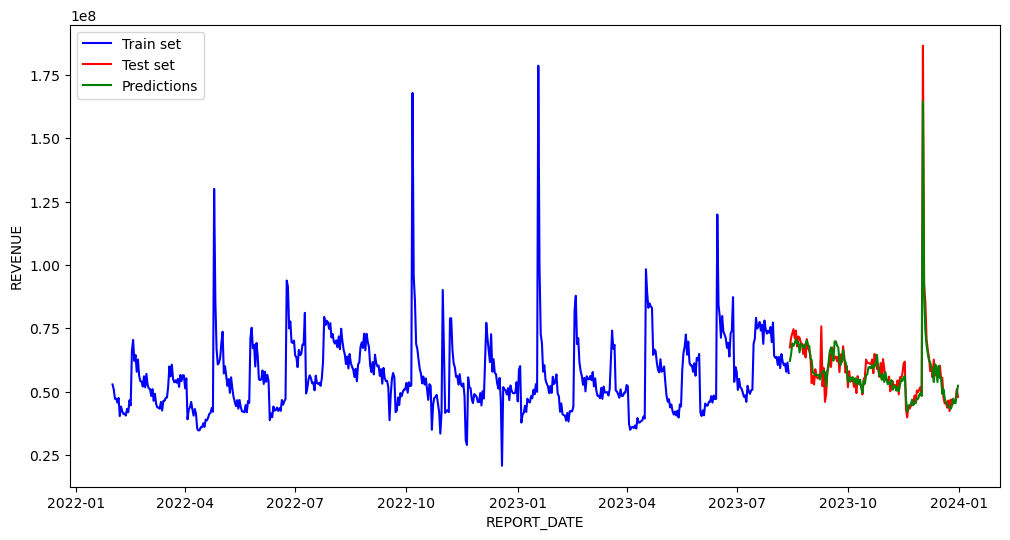

In [14]:
group_split_value = int(len(grouped_df) * 0.8)

# Making a df for predictions ONLY
predictions_df = pd.DataFrame({
    'REPORT_DATE': grouped_df.iloc[group_split_value:]['REPORT_DATE'].values,
    'PREDICTION': y_pred
})

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df.iloc[:group_split_value], x='REPORT_DATE', y='REVENUE',c="b",label="Train set")
sns.lineplot(data=grouped_df.iloc[group_split_value:], x='REPORT_DATE', y='REVENUE',c="r",label="Test set")
sns.lineplot(data=predictions_df, x='REPORT_DATE', y='PREDICTION', color="g", linestyle="-", label="Predictions")


In [15]:
mae = np.abs(y_pred - y_test).mean()
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 2906533.6714285715


<p>This indicates that our model has an average revenue discrepancy of approximately 3 million. This unsignificant margin is likely attributable to some <b>outliers</b> within our dataset.</p>

# Fusing XGBoost with Polynomial regression for optimal result

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [30]:
# Column transformer
preprocessing_pipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),  # Apply polynomial features
    ('scaler', StandardScaler())                                # Apply scaling
])

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline),
    ('model', xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.01, max_depth=3, n_estimators=300, random_state=100))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('poly',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=False)),
                                 ('scaler', StandardScaler())])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, random_state=100, ...))])

In [31]:
y_pred = pipeline.predict(X_test)
mae = np.abs(y_pred - y_test).mean()
mae

3499548.942857143

<Axes: xlabel='REPORT_DATE', ylabel='REVENUE'>

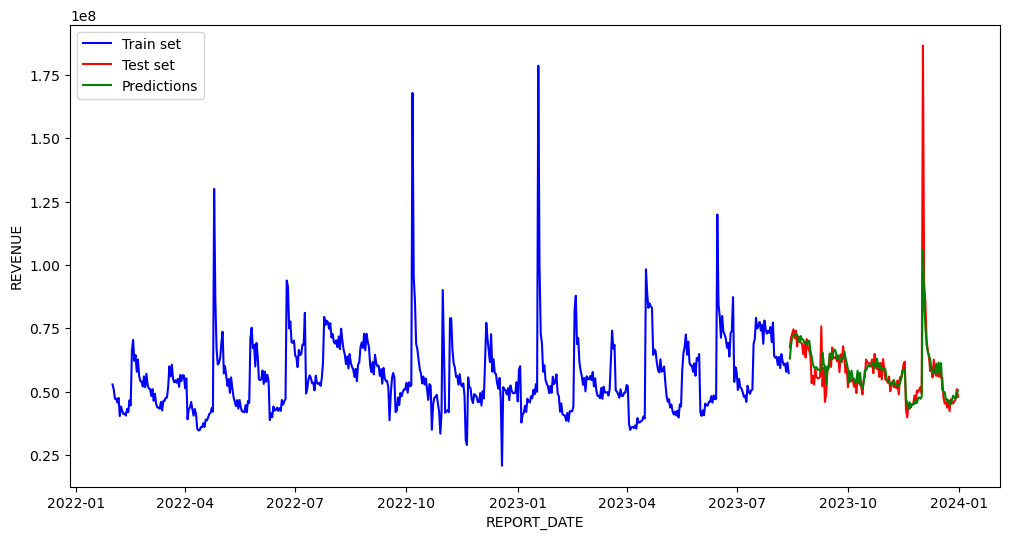

In [32]:
# Making a df for predictions ONLY
predictions_df = pd.DataFrame({
    'REPORT_DATE': grouped_df.iloc[group_split_value:]['REPORT_DATE'].values,
    'PREDICTION': y_pred
})

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df.iloc[:group_split_value], x='REPORT_DATE', y='REVENUE',c="b",label="Train set")
sns.lineplot(data=grouped_df.iloc[group_split_value:], x='REPORT_DATE', y='REVENUE',c="r",label="Test set")
sns.lineplot(data=predictions_df, x='REPORT_DATE', y='PREDICTION', color="g", linestyle="-", label="Predictions")

Text(0.5, 1.0, 'Comparison of MAE for XGBoost Models')

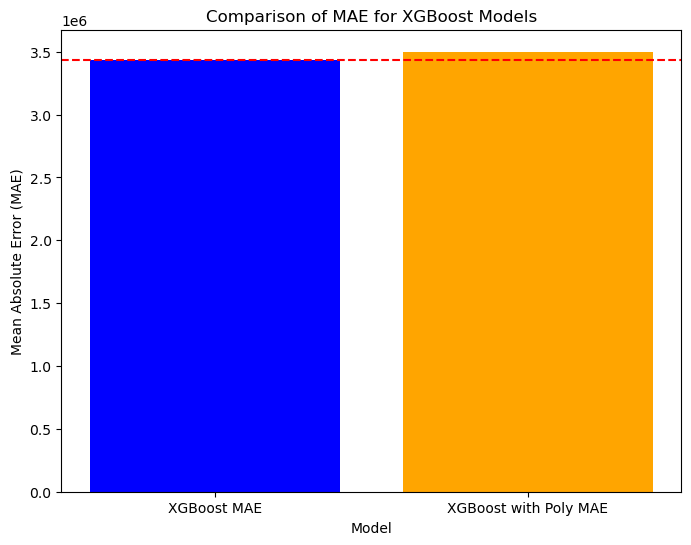

In [37]:
XG_mae = 3436286.714285714
XG_poly_mae = 3499548.942857143

models = ['XGBoost MAE', 'XGBoost with Poly MAE']
mae_values = [XG_mae, XG_poly_mae]

# Plot
plt.figure(figsize=(8, 6))
plt.axhline(y=XG_mae, color='red', linestyle='--')
plt.bar(models, mae_values, color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE for XGBoost Models')

As we can see there isn t a big difference in terms of efficiency but the addition of the polynomial features has decreased the reliability of the model

In [39]:
error_margin = XG_mae / grouped_df['REVENUE'].mean() * 100
print(f"Error margin for test set: {error_margin:.2f}%")

Error margin for test set: 6.10%


## Let's check what are the most important features for our model

In [35]:
from xgboost import plot_importance # To plot the weight of each feature

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

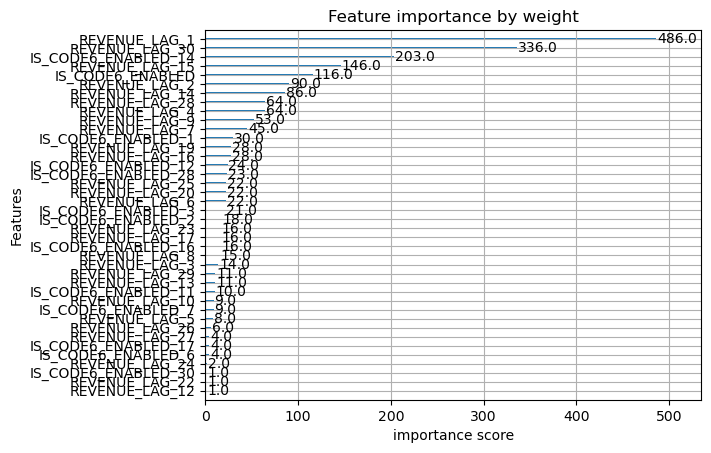

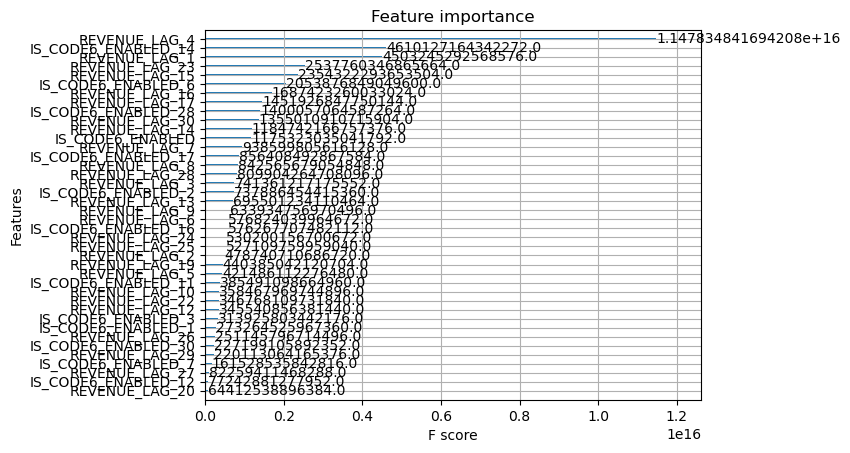

In [36]:
plot_importance(model, importance_type = 'weight', title="Feature importance by weight",xlabel="importance score") # By weight
plot_importance(model, importance_type = 'gain')